In [1]:
import warnings
warnings.filterwarnings('ignore')

# install API wrapper first
!pip install onboard.client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.9/249.9 KB 543.8 kB/s eta 0:00:00
  Attempting uninstall: orjson
    Found existing installation: orjson 3.6.7
    Uninstalling orjson-3.6.7:
      Successfully uninstalled orjson-3.6.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.37.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.4 which is incompatible.
apache-beam 2.37.0 requires httplib2<0.20.0,>=0.8, but you have httplib2 0.20.4 which is incompatible.
apache-beam 2.37.0 requires pyarrow<7.0.0,>=0.15.1, but you have pyarrow 7.0.0 which is incompatible.


# Import Libraries:

In [2]:
# for data processing
import pandas as pd
import numpy as np
import seaborn as sns
cmap=sns.color_palette("Spectral")
import statsmodels as sm
from datetime import datetime, timezone
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.style.use('ggplot')

# for API calls
import requests

# for equipment types (i.e. fans, AHU) / point types (i.e. zone temp)
from onboard.client import RtemClient

# set parameters for querying sensor data
from onboard.client.models import PointSelector
query = PointSelector()

# Connect to Onboard API:

In [2]:
# enter my API key
api_key = '...(enter your RTEM API key here)...'

# connect to RTEM client with my API key
client = RtemClient(api_key=api_key)


NameError: name 'RtemClient' is not defined

# Extract Eequipment Information:
* We have 39 different types of equipments.

# 1.0 Raw Data Review

## 1.1 Equipment Type

In [4]:
# get equipment info
types = client.get_equipment_types()
equip_type = pd.json_normalize(types)

# review info
# equip_type.plot()
# plt.show()
# print(equip_type.describe())
print('equipment_type examples:')
display(equip_type.head(2))
print()
print('We have 39 Equipment Types in our database:')
print('-' * 45)
display(equip_type[['name_long','tag_name','id']].sort_values(by='id').set_index('id'))
print()
print(equip_type.info())

equipment_type examples:


,id,tag_name,name_long,name_abbr,active,flow_order,critical_point_types,sub_types,tags
0,12,ahu,Air Handling Unit,AHU,True,2,"[79, 85, 103, 159, 160]","[{'id': 1, 'equipment_type_id': 12, 'tag_name'...","[hvac, ahu]"
1,19,boiler,Boiler,BLR,True,1,"[88, 131, 92, 167, 121]","[{'id': 4, 'equipment_type_id': 19, 'tag_name'...","[hvac, boiler]"



We have 39 Equipment Types in our database:
---------------------------------------------


,name_long,tag_name
id,,
7,Variable Air Volume,vav
9,Fan Coil Unit,fcu
12,Air Handling Unit,ahu
19,Boiler,boiler
20,Chilled Water Plant,chilledWaterPlant
21,Chiller,chiller
22,Condenser,condenser
23,Cooling Tower,coolingTower
24,Electrical Panel,panel



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    39 non-null     int64 
 1   tag_name              39 non-null     object
 2   name_long             39 non-null     object
 3   name_abbr             39 non-null     object
 4   active                39 non-null     bool  
 5   flow_order            39 non-null     int64 
 6   critical_point_types  39 non-null     object
 7   sub_types             39 non-null     object
 8   tags                  39 non-null     object
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ KB
None


## 1.2 Equipment - Sub Type

In [5]:
# list of equipment tags
equip_tag_names = equip_type.tag_name.unique().tolist()

# for each equipment tag, if there is more than 1 subtype, list all.
print(f'we have 15 equipments, which have 1-9 Sub Types:')
print('-'*70)
for e in equip_tag_names:
    sub_type = pd.DataFrame(equip_type.loc[equip_type.tag_name == e,'sub_types'].item())
    
    if sub_type.shape[0] >0:
        print()
        print()
        print(f'{e}:')
        display(sub_type)
# sub_type = pd.DataFrame(equip_type.loc[equip_type.tag_name == 'boiler','sub_types'].item())
print()
display(sub_type)

we have 15 equipments, which have 1-9 Sub Types:
----------------------------------------------------------------------


ahu:


,id,equipment_type_id,tag_name,name_long,name_abbr
0,1,12,erv,Energy Recovery Ventilation Unit,ERV
1,2,12,mau,Make Up Air Unit,MAU
2,3,12,rtu,Roof Top Unit,RTU




boiler:


,id,equipment_type_id,tag_name,name_long,name_abbr
0,4,19,hotWaterBoiler,Hot Water Boiler,BLR
1,5,19,steamBoiler,Steam Boiler,BLR




chiller:


,id,equipment_type_id,tag_name,name_long,name_abbr
0,7,21,centrifugalChiller,Centrifugal Chiller,CH
1,8,21,reciprocalChiller,Reciprocal Chiller,CH
2,9,21,screwChiller,Screw Chiller,CH
3,6,21,absorptionChiller,Absorption Chiller,CH




fan:


,id,equipment_type_id,tag_name,name_long,name_abbr
0,12,26,exhaustFan,Exhaust Fan,EFN
1,13,26,reliefFan,Relief Fan,RlFN
2,14,26,returnFan,Return Fan,RFN
3,15,26,supplyFan,Supply Fan,SFN
4,27,26,boosterFan,Booster Fan,BFN
5,28,26,coolingTowerFan,Cooling Tower Fan,CTFN




hotWaterPlant:


,id,equipment_type_id,tag_name,name_long,name_abbr
0,43,30,domesticHotWaterPlant,Domestic Hot Water Plant,DHSYS




meter:


,id,equipment_type_id,tag_name,name_long,name_abbr
0,16,31,elecMeter,Electrical Meter,METER
1,17,31,gasMeter,Gas Meter,METER
2,18,31,steamMeter,Steam Meter,METER
3,19,31,waterMeter,Water Meter,METER
4,44,31,thermalMeter,Thermal Meter,METER




pump:


,id,equipment_type_id,tag_name,name_long,name_abbr
0,20,32,chilledWaterPump,Chilled Water Pump,CHWP
1,21,32,circPump,Circulation Pump,CIRCPUMP
2,22,32,domesticWaterPump,Domestic Water Pump,DWPUMP
3,23,32,dualTempWaterPump,Dual Temp Water Pump,DTWPUMP
4,25,32,hotWaterPump,Hot Water Pump,HWP
5,26,32,condenserWaterPump,Condenser Water Pump,CWP
6,24,32,glycolPump,Glycol Pump,GLYCPUMP
7,33,32,sprayPump,Spray Pump,SPRAYPUMP
8,42,32,sweeperPump,Sweeper Pump,SWPRPUMP




vav:


,id,equipment_type_id,tag_name,name_long,name_abbr
0,32,7,exhaustVAV,Exhaust Air VAV,EXHVAV




ductHeater:


,id,equipment_type_id,tag_name,name_long,name_abbr
0,36,39,hydronicDuctHeater,Hydronic Duct Heater,HYDRNCDUCT
1,37,39,furnaceDuctHeater,Furnace Duct Heater,FRNCDUCT




waterLoop:


,id,equipment_type_id,tag_name,name_long,name_abbr
0,45,57,domesticWaterLoop,Domestic Water Loop,DWLOOP
1,46,57,hotWaterLoop,Hot Water Loop,HWLOOP
2,47,57,chilledWaterLoop,Chilled Water Loop,CHWLOOP




radiantEquip:


,id,equipment_type_id,tag_name,name_long,name_abbr
0,29,40,chilledBeam,Chilled Beam,CHBEAM
1,30,40,radiantFloor,Radiant Floor,RDNTFL
2,31,40,radiator,Radiator,RDTR




site:


,id,equipment_type_id,tag_name,name_long,name_abbr
0,35,37,weatherStation,Weather Station,WTHR




panel:


,id,equipment_type_id,tag_name,name_long,name_abbr
0,10,24,sitePanel,Site Panel,elecPanel
1,11,24,subPanelOf,Sub Panel,elecPanel




lighting:


,id,equipment_type_id,tag_name,name_long,name_abbr
0,34,42,uvLighting,UV Lighting,UV
1,38,42,dimmerControlledLighting,Dimmer Controlled Lighting,DMRLIGHT
2,39,42,sceneControlledLighting,Scene Controlled Lighting,SCNLIGHT
3,40,42,photocellControlledLighting,Photocell Controlled Lighting,PHCLIGHT




fireSafetyEquipment:


,id,equipment_type_id,tag_name,name_long,name_abbr
0,41,54,fireControlPanel,Fire Control Panel,FIREPNL


""


## 1.3 Point Type
* A point type: a sensor reading on a piece of equipment.
* All points and equipments are tagged using [Haystack Tag Sets](https://project-haystack.org/doc/appendix/tags).

Above definition and information provided by RTEM hackathon team (Kaggle RTEM notebook, 2022).

In [6]:
# get point info
types = client.get_all_point_types()
point_type = pd.json_normalize(types)

# review info
# point_type.plot()
# plt.show()
print()
# print(point_type.describe())
print('point_type examples:')
display(point_type.head(2))
print()
print(f'We have {len(point_type)} Point Types (tag_name) in our database:')
print('-' * 60)
display(point_type['tag_name'].value_counts())
print()
print(point_type.info())


point_type examples:


,id,tag_name,active,measurement_id,tag_set_ids,tags,default_unit_id
0,124,Occupied Heating Setpoint,True,1,"[15, 2, 4, 62, 51, 55]","[air, sp, temp, zone, heating, occ]",None
1,118,Outside Air Carbon Dioxide,True,6,"[15, 8, 1, 24]","[air, co2, sensor, outside]",None



We have 652 Point Types (tag_name) in our database:
------------------------------------------------------------


Occupied Heating Setpoint           1
Gas Leak Detection Alarm            1
Cooling Status                      1
Dehumidification Command            1
Dial Resistance                     1
                                   ..
Elevator Rear Open Limit Status     1
Elevator Rear Close Limit Status    1
Elevator Rear Edge Status           1
Elevator Rear Opening Status        1
untagged                            1
Name: tag_name, Length: 652, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               652 non-null    int64 
 1   tag_name         652 non-null    object
 2   active           652 non-null    bool  
 3   measurement_id   652 non-null    int64 
 4   tag_set_ids      652 non-null    object
 5   tags             652 non-null    object
 6   default_unit_id  0 non-null      object
dtypes: bool(1), int64(2), object(4)
memory usage: 31.3+ KB
None


## 1.4 Haystack Tags
Tags are converted to Haystack Tags from below orignial sources :
* onboard
* haystack
* brick

In [7]:
# original data sources
pd.json_normalize(client.get_tags()).def_source.value_counts()

onboard     104
haystack    103
brick        36
Name: def_source, dtype: int64

In [8]:
# Haystack point tag names (a.k.a. sensor readings) and definitions
hay = pd.json_normalize(client.get_tags())
hay

,id,name,definition,def_source,def_url,category
0,120,battery,A container that stores chemical energy that c...,brick,https://brickschema.org/ontology/1.1/classes/B...,None
1,191,exhaustVAV,A device that regulates the volume of air bein...,onboard,None,None
2,193,oil,"A viscous liquid derived from petroleum, espec...",brick,https://brickschema.org/ontology/1.2/classes/Oil/,None
3,114,fumeHood,A fume-collection device mounted over a work s...,brick,https://brickschema.org/ontology/1.1/classes/F...,None
4,118,limit,A parameter that places a lower or upper bound...,brick,https://brickschema.org/ontology/1.1/classes/L...,Point Class
...,...,...,...,...,...,...
238,12,speed,When used as a vfd point it is speed measured ...,onboard,None,None
239,67,makeup,Points associated with the flow of makeup air;...,onboard,None,None
240,60,max,Associated with a maximum value.,onboard,None,Quantity Modifier
241,61,min,Associated with a minumum value.,onboard,None,Quantity Modifier


# 2.0 Query Data Points
1. query = PointSelector():
* point_types
* buildings

2. client
* select_points(query)
* get_points_by_ids(points)


In [9]:
from onboard.client.models import PointSelector

In [10]:
query = PointSelector()

In [11]:
query.point_types = ['Real Power', 'Zone Temperature']
query.buildings = ['385']

In [12]:
# points identified by id
selection = client.select_points(query)
points = selection['points']
points

[228631, 228632, 228633, 228634, 228635, 228636, 228637]

In [13]:
sensor_metadata = pd.json_normalize(client.get_points_by_ids(points))
sensor_metadata

,id,building_id,last_updated,first_updated,device,network_device,objectId,name,description,units,tagged_units,raw_unit_id,value,type,point_type_id,measurement_id,datasource_hash,topic,state_text,equip_id
0,228631,385,1.604203e+12,1.540872e+12,,None,,CH1 kW KW,CH1 kW KW,kW,kw,17,0.0,Real Power,221,13,bbaf33934c44c54808a756a9789fe62b,nyserda+0000092344+chiller1+CH1 kW KW,None,33931
1,228632,385,1.604203e+12,1.540872e+12,,None,,CH1 TONS Tons,CH1 TONS Tons,tons,tons,33,0.0,Real Power,221,13,731d933e12b2a780e49b983a9c16760e,nyserda+0000092344+chiller1+CH1 TONS Tons,None,33931
2,228633,385,1.604203e+12,1.540872e+12,,None,,CH2 kW KW,CH2 kW KW,kW,kw,17,0.0,Real Power,221,13,d696e07c8e297c176eb98ad6f30d8bf3,nyserda+0000092344+chiller2+CH2 kW KW,None,33932
3,228634,385,1.604203e+12,1.540872e+12,,None,,CH2 TONS Tons,CH2 TONS Tons,tons,tons,33,0.03,Real Power,221,13,27d2f8cf2c7e4e8863b5a8cfdcf4711e,nyserda+0000092344+chiller2+CH2 TONS Tons,None,33932
4,228635,385,1.604203e+12,1.540872e+12,,None,,CH3 kW KW,CH3 kW KW,kW,kw,17,0.0,Real Power,221,13,24a1784d57e302a7d6ac342037e07670,nyserda+0000092344+chiller3+CH3 kW KW,None,33933
5,228636,385,1.604203e+12,1.540872e+12,,None,,CH3 TONS Tons,CH3 TONS Tons,tons,tons,33,0.0,Real Power,221,13,863d851ac8f9d95b24aca324a25314d2,nyserda+0000092344+chiller3+CH3 TONS Tons,None,33933
6,228637,385,1.604203e+12,1.540872e+12,,None,,PFHX CHW TONS Tons,PFHX CHW TONS Tons,tons,tons,33,69.94,Real Power,221,13,fc05cd745d353161a53d315c9651603f,nyserda+0000092344+heatExchanger1+PFHX CHW TON...,None,33937


In [14]:
# get a list of all the equipment in your building
equipment = pd.json_normalize(client.get_all_equipment())
equipment.head(2)

,id,building_id,equip_id,suffix,equip_type_name,equip_type_id,equip_type_abbr,equip_type_tag,equip_subtype_name,equip_subtype_id,equip_subtype_tag,flow_order,floor_num_physical,floor_num_served,area_served_desc,equip_dis,parent_equip,child_equip,points,tags
0,28797,441,boiler-1,1,Boiler,19,BLR,boiler,None,NaN,None,1,None,None,None,None,[28803],[],"[{'id': 310029, 'building_id': 441, 'last_upda...","[boiler, hvac]"
1,28798,441,boiler-2,2,Boiler,19,BLR,boiler,None,NaN,None,1,None,None,None,None,[28803],[],"[{'id': 310079, 'building_id': 441, 'last_upda...","[boiler, hvac]"


In [15]:
equipment.describe()

,id,building_id,equip_type_id,equip_subtype_id,flow_order
count,6085.000000,6085.000000,6085.000000,2283.000000,6085.000000
mean,25126.293344,315.225637,22.620871,15.028033,3.009696
std,6370.300124,136.892891,10.877284,6.000665,1.437524
min,16903.000000,98.000000,7.000000,1.000000,1.000000
25%,18907.000000,169.000000,12.000000,14.000000,2.000000
50%,22683.000000,354.000000,26.000000,15.000000,3.000000
75%,31506.000000,434.000000,31.000000,16.000000,4.000000
max,36563.000000,503.000000,50.000000,43.000000,5.000000


In [16]:
equipment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6085 entries, 0 to 6084
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  6085 non-null   int64  
 1   building_id         6085 non-null   int64  
 2   equip_id            6085 non-null   object 
 3   suffix              6025 non-null   object 
 4   equip_type_name     6085 non-null   object 
 5   equip_type_id       6085 non-null   int64  
 6   equip_type_abbr     6085 non-null   object 
 7   equip_type_tag      6085 non-null   object 
 8   equip_subtype_name  2283 non-null   object 
 9   equip_subtype_id    2283 non-null   float64
 10  equip_subtype_tag   2283 non-null   object 
 11  flow_order          6085 non-null   int64  
 12  floor_num_physical  0 non-null      object 
 13  floor_num_served    0 non-null      object 
 14  area_served_desc    3501 non-null   object 
 15  equip_dis           3686 non-null   object 
 16  parent

In [17]:
sensor_metadata.head(2)

,id,building_id,last_updated,first_updated,device,network_device,objectId,name,description,units,tagged_units,raw_unit_id,value,type,point_type_id,measurement_id,datasource_hash,topic,state_text,equip_id
0,228631,385,1.604203e+12,1.540872e+12,,None,,CH1 kW KW,CH1 kW KW,kW,kw,17,0.0,Real Power,221,13,bbaf33934c44c54808a756a9789fe62b,nyserda+0000092344+chiller1+CH1 kW KW,None,33931
1,228632,385,1.604203e+12,1.540872e+12,,None,,CH1 TONS Tons,CH1 TONS Tons,tons,tons,33,0.0,Real Power,221,13,731d933e12b2a780e49b983a9c16760e,nyserda+0000092344+chiller1+CH1 TONS Tons,None,33931


In [18]:
equipment.head(2)

,id,building_id,equip_id,suffix,equip_type_name,equip_type_id,equip_type_abbr,equip_type_tag,equip_subtype_name,equip_subtype_id,equip_subtype_tag,flow_order,floor_num_physical,floor_num_served,area_served_desc,equip_dis,parent_equip,child_equip,points,tags
0,28797,441,boiler-1,1,Boiler,19,BLR,boiler,None,NaN,None,1,None,None,None,None,[28803],[],"[{'id': 310029, 'building_id': 441, 'last_upda...","[boiler, hvac]"
1,28798,441,boiler-2,2,Boiler,19,BLR,boiler,None,NaN,None,1,None,None,None,None,[28803],[],"[{'id': 310079, 'building_id': 441, 'last_upda...","[boiler, hvac]"


In [19]:
# left = sensor_metadata (id, building_id)
# right = equipment (id, building_id, equip_id)
merged = pd.merge(sensor_metadata, equipment, how='left', left_on=['building_id','equip_id'], right_on=['building_id','id'])
merged

,id_x,building_id,last_updated,first_updated,device,network_device,objectId,name,description,units,...,equip_subtype_tag,flow_order,floor_num_physical,floor_num_served,area_served_desc,equip_dis,parent_equip,child_equip,points,tags
0,228631,385,1.604203e+12,1.540872e+12,,None,,CH1 kW KW,CH1 kW KW,kW,...,None,1,None,None,None,500 Ton Trane CVHE R-123 with Tracer Adapt iVi...,[],[],"[{'id': 228632, 'building_id': 385, 'last_upda...","[chiller, hvac]"
1,228632,385,1.604203e+12,1.540872e+12,,None,,CH1 TONS Tons,CH1 TONS Tons,tons,...,None,1,None,None,None,500 Ton Trane CVHE R-123 with Tracer Adapt iVi...,[],[],"[{'id': 228632, 'building_id': 385, 'last_upda...","[chiller, hvac]"
2,228633,385,1.604203e+12,1.540872e+12,,None,,CH2 kW KW,CH2 kW KW,kW,...,None,1,None,None,None,500 Ton Trane CVHE R-123 with Tracer Adapt iVi...,[],[],"[{'id': 228634, 'building_id': 385, 'last_upda...","[chiller, hvac]"
3,228634,385,1.604203e+12,1.540872e+12,,None,,CH2 TONS Tons,CH2 TONS Tons,tons,...,None,1,None,None,None,500 Ton Trane CVHE R-123 with Tracer Adapt iVi...,[],[],"[{'id': 228634, 'building_id': 385, 'last_upda...","[chiller, hvac]"
4,228635,385,1.604203e+12,1.540872e+12,,None,,CH3 kW KW,CH3 kW KW,kW,...,None,1,None,None,None,500 Ton Trane CVHE R-123 with Tracer Adapt iVi...,[],[],"[{'id': 228636, 'building_id': 385, 'last_upda...","[chiller, hvac]"
5,228636,385,1.604203e+12,1.540872e+12,,None,,CH3 TONS Tons,CH3 TONS Tons,tons,...,None,1,None,None,None,500 Ton Trane CVHE R-123 with Tracer Adapt iVi...,[],[],"[{'id': 228636, 'building_id': 385, 'last_upda...","[chiller, hvac]"
6,228637,385,1.604203e+12,1.540872e+12,,None,,PFHX CHW TONS Tons,PFHX CHW TONS Tons,tons,...,None,1,None,None,None,None,[],[],"[{'id': 228637, 'building_id': 385, 'last_upda...","[heatExchanger, hvac]"


In [20]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_x                7 non-null      int64  
 1   building_id         7 non-null      int64  
 2   last_updated        7 non-null      float64
 3   first_updated       7 non-null      float64
 4   device              7 non-null      object 
 5   network_device      0 non-null      object 
 6   objectId            7 non-null      object 
 7   name                7 non-null      object 
 8   description         7 non-null      object 
 9   units               7 non-null      object 
 10  tagged_units        7 non-null      object 
 11  raw_unit_id         7 non-null      int64  
 12  value               7 non-null      object 
 13  type                7 non-null      object 
 14  point_type_id       7 non-null      int64  
 15  measurement_id      7 non-null      int64  
 16  datasource_h

# NYC Equipment Summary:

# 1.0 Preprocessing
* merge data (points + buildings + equipements)
* treat missing data
* encode categorical data
* correlation between features

In [21]:
points = pd.json_normalize(client.get_all_points())
points.head()

,id,building_id,last_updated,first_updated,device,network_device,objectId,name,description,units,...,measurement_id,datasource_hash,topic,state_text,equip_id,state_text.1,state_text.2,state_text.3,state_text.4,state_text.5
0,310029,441,1.560571e+12,1.550542e+12,None,None,None,245 E 149th St. Boiler-1 Fault Code,None,?,...,18,b115b5053493748f7076ad09f69c4456,nyserda+0000088737+boiler-1+245 E 149th St. Bo...,NaN,28797,NaN,NaN,NaN,NaN,NaN
1,310009,441,1.560485e+12,1.550701e+12,None,None,None,225 E 149th St. Boiler-1 Exhaust Temp,None,F,...,1,4a1a11502acee3078352da312c40c262,nyserda+0000088737+boiler-1+225 E 149th St. Bo...,NaN,28797,NaN,NaN,NaN,NaN,NaN
2,310010,441,1.560571e+12,1.550504e+12,None,None,None,225 E 149th St. Boiler-1 Fault Code,None,?,...,18,55882633fe8fb5aac7dac643c99b1af5,nyserda+0000088737+boiler-1+225 E 149th St. Bo...,NaN,28797,NaN,NaN,NaN,NaN,NaN
3,310011,441,1.560485e+12,1.550504e+12,None,None,None,225 E 149th St. Boiler-1 FFWD Temp,None,?,...,18,831a8df09b848f53e807fa0204c45eaa,nyserda+0000088737+boiler-1+225 E 149th St. Bo...,NaN,28797,NaN,NaN,NaN,NaN,NaN
4,310012,441,1.560485e+12,1.550504e+12,None,None,None,225 E 149th St. Boiler-1 Fire Rate In,None,?,...,18,aa147c829c7ed55b6e93cdbbb8b43d55,nyserda+0000088737+boiler-1+225 E 149th St. Bo...,NaN,28797,NaN,NaN,NaN,NaN,NaN


In [22]:
points.select_dtypes(['int']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44390 entries, 0 to 44389
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              44390 non-null  int64
 1   building_id     44390 non-null  int64
 2   raw_unit_id     44390 non-null  int64
 3   point_type_id   44390 non-null  int64
 4   measurement_id  44390 non-null  int64
 5   equip_id        44390 non-null  int64
dtypes: int64(6)
memory usage: 2.0 MB


In [23]:
bd = pd.json_normalize(client.get_all_buildings())
bd

,id,org_id,name,address,sq_ft,image_src,bms_manufacturer,bms_product_name,bms_version,timezone,...,info.sunend,info.geoCity,info.geoState,info.m2fstart,info.satstart,info.sunstart,info.yearBuilt,info.geoCountry,info.weatherRef,info.customerType
0,441,5,88737,None,551143.0,None,None,None,None,America/New_York,...,,Bronx,NY,,,,,US,,Multifamily
1,140,5,83483,None,21869.0,None,None,None,None,America/New_York,...,,New York,NY,,,,,US,,Commercial Office
2,191,5,94414,None,198057.0,None,None,None,None,America/New_York,...,23:00,Victor,NY,07:30,07:30,07:30,,US,,Commercial Retail
3,231,5,89496,None,NaN,None,None,None,None,America/New_York,...,,New York,NY,,,,,US,,
4,248,5,116742,None,127000.0,None,None,None,None,America/New_York,...,,New York,NY,,,,,US,,Multifamily
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,353,5,94413,None,198057.0,None,None,None,None,America/New_York,...,23:00,Henrietta,NY,07:30,07:30,07:30,,US,,Commercial Retail
225,370,5,95457,None,421316.0,None,None,None,None,America/New_York,...,,New York,NY,,,,,US,,Hospitality
226,383,5,79528,None,75000.0,None,None,None,None,America/New_York,...,NaN,Purchase,New York,04:00:00,NaN,NaN,1971,US,NaN,Commercial Office
227,398,5,109188,None,860000.0,None,None,None,None,America/New_York,...,,New York,NY,,,,,US,,Commercial Office


In [24]:
bd.select_dtypes(['int']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           229 non-null    int64
 1   org_id       229 non-null    int64
 2   equip_count  229 non-null    int64
 3   point_count  229 non-null    int64
dtypes: int64(4)
memory usage: 7.3 KB


In [25]:
points[['building_id']]

,building_id
0,441
1,441
2,441
3,441
4,441
...,...
44385,399
44386,399
44387,399
44388,399


In [26]:
bd

,id,org_id,name,address,sq_ft,image_src,bms_manufacturer,bms_product_name,bms_version,timezone,...,info.sunend,info.geoCity,info.geoState,info.m2fstart,info.satstart,info.sunstart,info.yearBuilt,info.geoCountry,info.weatherRef,info.customerType
0,441,5,88737,None,551143.0,None,None,None,None,America/New_York,...,,Bronx,NY,,,,,US,,Multifamily
1,140,5,83483,None,21869.0,None,None,None,None,America/New_York,...,,New York,NY,,,,,US,,Commercial Office
2,191,5,94414,None,198057.0,None,None,None,None,America/New_York,...,23:00,Victor,NY,07:30,07:30,07:30,,US,,Commercial Retail
3,231,5,89496,None,NaN,None,None,None,None,America/New_York,...,,New York,NY,,,,,US,,
4,248,5,116742,None,127000.0,None,None,None,None,America/New_York,...,,New York,NY,,,,,US,,Multifamily
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,353,5,94413,None,198057.0,None,None,None,None,America/New_York,...,23:00,Henrietta,NY,07:30,07:30,07:30,,US,,Commercial Retail
225,370,5,95457,None,421316.0,None,None,None,None,America/New_York,...,,New York,NY,,,,,US,,Hospitality
226,383,5,79528,None,75000.0,None,None,None,None,America/New_York,...,NaN,Purchase,New York,04:00:00,NaN,NaN,1971,US,NaN,Commercial Office
227,398,5,109188,None,860000.0,None,None,None,None,America/New_York,...,,New York,NY,,,,,US,,Commercial Office


In [27]:
bd[['id', 'name', 'sq_ft', 'info.customerType','info.geoCity','info.yearBuilt','info.floors']]

,id,name,sq_ft,info.customerType,info.geoCity,info.yearBuilt,info.floors
0,441,88737,551143.0,Multifamily,Bronx,,
1,140,83483,21869.0,Commercial Office,New York,,
2,191,94414,198057.0,Commercial Retail,Victor,,
3,231,89496,NaN,,New York,,
4,248,116742,127000.0,Multifamily,New York,,
...,...,...,...,...,...,...,...
224,353,94413,198057.0,Commercial Retail,Henrietta,,
225,370,95457,421316.0,Hospitality,New York,,
226,383,79528,75000.0,Commercial Office,Purchase,1971,4
227,398,109188,860000.0,Commercial Office,New York,,


In [28]:
# merge points + builidngs
po = pd.merge(points,bd[['id', 'name', 'sq_ft', 'info.customerType','info.geoCity','info.yearBuilt','info.floors']], how='left', left_on=['building_id'], right_on=['id'])
po.head(2)

,id_x,building_id,last_updated,first_updated,device,network_device,objectId,name_x,description,units,...,state_text.3,state_text.4,state_text.5,id_y,name_y,sq_ft,info.customerType,info.geoCity,info.yearBuilt,info.floors
0,310029,441,1.560571e+12,1.550542e+12,None,None,None,245 E 149th St. Boiler-1 Fault Code,None,?,...,NaN,NaN,NaN,441,88737,551143.0,Multifamily,Bronx,,
1,310009,441,1.560485e+12,1.550701e+12,None,None,None,225 E 149th St. Boiler-1 Exhaust Temp,None,F,...,NaN,NaN,NaN,441,88737,551143.0,Multifamily,Bronx,,


In [29]:
po.select_dtypes('int').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44390 entries, 0 to 44389
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id_x            44390 non-null  int64
 1   building_id     44390 non-null  int64
 2   raw_unit_id     44390 non-null  int64
 3   point_type_id   44390 non-null  int64
 4   measurement_id  44390 non-null  int64
 5   equip_id        44390 non-null  int64
 6   id_y            44390 non-null  int64
dtypes: int64(7)
memory usage: 2.7 MB


In [30]:
equipment.head(2)

,id,building_id,equip_id,suffix,equip_type_name,equip_type_id,equip_type_abbr,equip_type_tag,equip_subtype_name,equip_subtype_id,equip_subtype_tag,flow_order,floor_num_physical,floor_num_served,area_served_desc,equip_dis,parent_equip,child_equip,points,tags
0,28797,441,boiler-1,1,Boiler,19,BLR,boiler,None,NaN,None,1,None,None,None,None,[28803],[],"[{'id': 310029, 'building_id': 441, 'last_upda...","[boiler, hvac]"
1,28798,441,boiler-2,2,Boiler,19,BLR,boiler,None,NaN,None,1,None,None,None,None,[28803],[],"[{'id': 310079, 'building_id': 441, 'last_upda...","[boiler, hvac]"


In [31]:
equipment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6085 entries, 0 to 6084
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  6085 non-null   int64  
 1   building_id         6085 non-null   int64  
 2   equip_id            6085 non-null   object 
 3   suffix              6025 non-null   object 
 4   equip_type_name     6085 non-null   object 
 5   equip_type_id       6085 non-null   int64  
 6   equip_type_abbr     6085 non-null   object 
 7   equip_type_tag      6085 non-null   object 
 8   equip_subtype_name  2283 non-null   object 
 9   equip_subtype_id    2283 non-null   float64
 10  equip_subtype_tag   2283 non-null   object 
 11  flow_order          6085 non-null   int64  
 12  floor_num_physical  0 non-null      object 
 13  floor_num_served    0 non-null      object 
 14  area_served_desc    3501 non-null   object 
 15  equip_dis           3686 non-null   object 
 16  parent

In [32]:
# merge (points + buildings) + equipments
po = pd.merge(po, equipment[['id','equip_type_abbr','equip_type_name','area_served_desc','tags']], how='left', left_on='equip_id', right_on='id')
po

,id_x,building_id,last_updated,first_updated,device,network_device,objectId,name_x,description,units,...,sq_ft,info.customerType,info.geoCity,info.yearBuilt,info.floors,id,equip_type_abbr,equip_type_name,area_served_desc,tags
0,310029,441,1.560571e+12,1.550542e+12,None,None,None,245 E 149th St. Boiler-1 Fault Code,None,?,...,551143.0,Multifamily,Bronx,,,28797,BLR,Boiler,None,"[boiler, hvac]"
1,310009,441,1.560485e+12,1.550701e+12,None,None,None,225 E 149th St. Boiler-1 Exhaust Temp,None,F,...,551143.0,Multifamily,Bronx,,,28797,BLR,Boiler,None,"[boiler, hvac]"
2,310010,441,1.560571e+12,1.550504e+12,None,None,None,225 E 149th St. Boiler-1 Fault Code,None,?,...,551143.0,Multifamily,Bronx,,,28797,BLR,Boiler,None,"[boiler, hvac]"
3,310011,441,1.560485e+12,1.550504e+12,None,None,None,225 E 149th St. Boiler-1 FFWD Temp,None,?,...,551143.0,Multifamily,Bronx,,,28797,BLR,Boiler,None,"[boiler, hvac]"
4,310012,441,1.560485e+12,1.550504e+12,None,None,None,225 E 149th St. Boiler-1 Fire Rate In,None,?,...,551143.0,Multifamily,Bronx,,,28797,BLR,Boiler,None,"[boiler, hvac]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44385,359906,399,1.596254e+12,1.580533e+12,None,None,None,Main Meter kW_v1,None,None,...,140400.0,Commercial Office,New York,,,32358,METER,Meter,None,"[meter, elecMeter]"
44386,359905,399,1.589532e+12,1.580533e+12,None,None,None,Main Meter kW_v0,None,None,...,140400.0,Commercial Office,New York,,,32358,METER,Meter,None,"[meter, elecMeter]"
44387,231120,399,1.543640e+12,1.528909e+12,,None,,Building Demand_value,Building Demand_value,kW,...,140400.0,Commercial Office,New York,,,32358,METER,Meter,None,"[meter, elecMeter]"
44388,231119,399,1.559361e+12,1.543640e+12,,None,,Building Demand_v1,Building Demand_v1,kW,...,140400.0,Commercial Office,New York,,,32358,METER,Meter,None,"[meter, elecMeter]"


In [33]:
po.head(1).T

,0
id_x,310029
building_id,441
last_updated,1560571200000.0
first_updated,1550541661000.0
device,None
network_device,None
objectId,None
name_x,245 E 149th St. Boiler-1 Fault Code
description,None
units,?


In [34]:
po.drop('id', axis=1, inplace=True)

In [35]:
# check % missing values
missing = pd.DataFrame(po.isna().sum()*100 /len(po))
missing.rename({0:'percent_missing'}, axis=1, inplace=True)
missing[missing['percent_missing'] > 0].sort_values('percent_missing',ascending=False)

,percent_missing
network_device,100.000000
state_text,100.000000
state_text.5,99.972967
state_text.4,99.950439
state_text.3,99.876098
state_text.2,97.262897
state_text.1,95.913494
tagged_units,66.988060
area_served_desc,31.482316
description,28.265375


In [36]:
# drop columns with almost missing values (>90%)
cols_missing = missing[missing['percent_missing']>90].index.tolist()
cols_missing
po.drop(columns=cols_missing, inplace=True)
po.head(2)

,id_x,building_id,last_updated,first_updated,device,objectId,name_x,description,units,tagged_units,...,name_y,sq_ft,info.customerType,info.geoCity,info.yearBuilt,info.floors,equip_type_abbr,equip_type_name,area_served_desc,tags
0,310029,441,1.560571e+12,1.550542e+12,None,None,245 E 149th St. Boiler-1 Fault Code,None,?,?,...,88737,551143.0,Multifamily,Bronx,,,BLR,Boiler,None,"[boiler, hvac]"
1,310009,441,1.560485e+12,1.550701e+12,None,None,225 E 149th St. Boiler-1 Exhaust Temp,None,F,f,...,88737,551143.0,Multifamily,Bronx,,,BLR,Boiler,None,"[boiler, hvac]"


In [37]:
# check % missing values again
missing = pd.DataFrame(po.isna().sum()*100 /len(po))
missing.rename({0:'percent_missing'}, axis=1, inplace=True)
missing[missing['percent_missing'] > 0].sort_values('percent_missing',ascending=False)

,percent_missing
tagged_units,66.988060
area_served_desc,31.482316
device,28.265375
objectId,28.265375
description,28.265375
units,15.890966
sq_ft,9.914395
info.yearBuilt,3.410678
info.floors,3.410678
info.customerType,2.822708


## 1.1 Export Preprocessed Points Data to .csv:

In [38]:
# export to csv
po.to_csv('retem_all_points_metadata.csv', index=False)

# 3.0 Data Interpretation

In [39]:
po.head(1).T

,0
id_x,310029
building_id,441
last_updated,1560571200000.0
first_updated,1550541661000.0
device,None
objectId,None
name_x,245 E 149th St. Boiler-1 Fault Code
description,None
units,?
tagged_units,?


In [40]:
print(f'Number of points: {len(points.id.unique())}')
print(f'Number of equipments: {len(points.equip_id.unique())}')
print(f'Number of buildings: {len(points.building_id.unique())}')

Number of points: 44390
Number of equipments: 6085
Number of buildings: 229


In [41]:
po.head(1).T

,0
id_x,310029
building_id,441
last_updated,1560571200000.0
first_updated,1550541661000.0
device,None
objectId,None
name_x,245 E 149th St. Boiler-1 Fault Code
description,None
units,?
tagged_units,?


In [42]:
po.name_x.value_counts()

                             29732
Plant Total CT kW KW             4
Main Meter kW_v0                 4
Main Meter kW_v1                 4
New York, NY Humidity            3
                             ...  
AC Units AC-1-1 SaFanSpd         1
AC Units AC-1-1 SaFanCmd         1
AC Units AC-1-1 RaDprPos         1
AC Units AC-1-1 PhtVlvPos        1
Building Demand_v0               1
Name: name_x, Length: 14284, dtype: int64

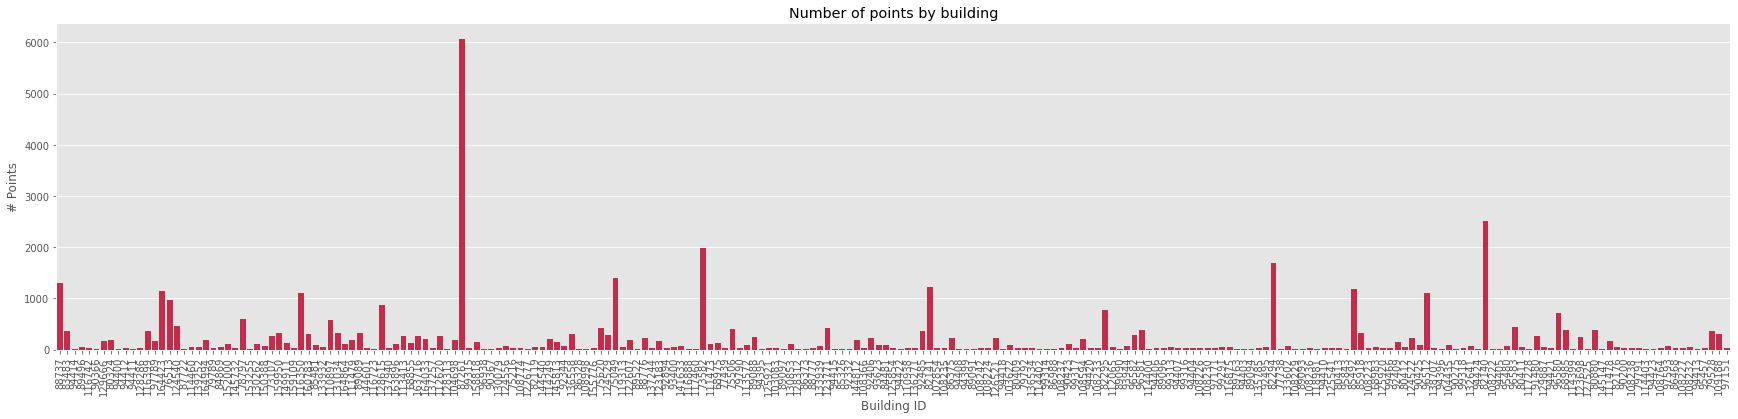

In [43]:
# number of points by building (sns.countplot)
# po.plot(subplots=True, figsize=(10,20))

# Let's create a fiture with custom size
fig, ax = plt.subplots(1,1,figsize=(30,6))

# The figure
g0 = sns.countplot(data=po, x='name_y', color='crimson', ax=ax)
ax.set_title('Number of points by building')
ax.set_xlabel('Building ID')
ax.set_ylabel('# Points')

# Rotate the labels to make it readable
labels = plt.xticks(rotation=90)

------------------------------------------------------
# Equipment Stats

------------------------------------------------------

In [44]:
equipment.groupby('building_id').count()

,id,equip_id,suffix,equip_type_name,equip_type_id,equip_type_abbr,equip_type_tag,equip_subtype_name,equip_subtype_id,equip_subtype_tag,flow_order,floor_num_physical,floor_num_served,area_served_desc,equip_dis,parent_equip,child_equip,points,tags
building_id,,,,,,,,,,,,,,,,,,,
98,38,38,38,38,38,38,38,25,25,25,38,0,0,38,38,38,38,38,38
99,126,126,125,126,126,126,126,47,47,47,126,0,0,23,124,126,126,126,126
100,3,3,2,3,3,3,3,3,3,3,3,0,0,0,0,3,3,3,3
101,70,70,70,70,70,70,70,3,3,3,70,0,0,70,70,70,70,70,70
103,16,16,16,16,16,16,16,12,12,12,16,0,0,0,7,16,16,16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,85,85,85,85,85,85,85,52,52,52,85,0,0,0,0,85,85,85,85
490,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,1,1,1,1
491,9,9,9,9,9,9,9,2,2,2,9,0,0,0,0,9,9,9,9


In [45]:
equipment

,id,building_id,equip_id,suffix,equip_type_name,equip_type_id,equip_type_abbr,equip_type_tag,equip_subtype_name,equip_subtype_id,equip_subtype_tag,flow_order,floor_num_physical,floor_num_served,area_served_desc,equip_dis,parent_equip,child_equip,points,tags
0,28797,441,boiler-1,1,Boiler,19,BLR,boiler,None,NaN,None,1,None,None,None,None,[28803],[],"[{'id': 310029, 'building_id': 441, 'last_upda...","[boiler, hvac]"
1,28798,441,boiler-2,2,Boiler,19,BLR,boiler,None,NaN,None,1,None,None,None,None,[28803],[],"[{'id': 310079, 'building_id': 441, 'last_upda...","[boiler, hvac]"
2,28799,441,boiler-3,3,Boiler,19,BLR,boiler,None,NaN,None,1,None,None,None,None,[28803],[],"[{'id': 310108, 'building_id': 441, 'last_upda...","[boiler, hvac]"
3,28800,441,boiler-4,4,Boiler,19,BLR,boiler,None,NaN,None,1,None,None,None,None,[28803],[],"[{'id': 310144, 'building_id': 441, 'last_upda...","[boiler, hvac]"
4,28801,441,boiler-5,5,Boiler,19,BLR,boiler,None,NaN,None,1,None,None,None,None,[28803],[],"[{'id': 310152, 'building_id': 441, 'last_upda...","[boiler, hvac]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6080,32354,399,chilledWaterPump,None,Pump,32,PUMP,pump,Chilled Water Pump,20.0,chilledWaterPump,1,None,None,None,None,[22751],[],"[{'id': 231126, 'building_id': 399, 'last_upda...","[pump, hvac, chilledWaterPump]"
6081,32355,399,chilledWaterPump-4,4,Pump,32,PUMP,pump,Chilled Water Pump,20.0,chilledWaterPump,1,None,None,None,None,[22751],[],"[{'id': 359904, 'building_id': 399, 'last_upda...","[pump, hvac, chilledWaterPump]"
6082,32356,399,condenser,None,Condenser,22,COND,condenser,None,NaN,None,1,None,None,None,None,[],[],"[{'id': 231136, 'building_id': 399, 'last_upda...","[hvac, condenser]"
6083,32357,399,condenserWaterPump,None,Pump,32,PUMP,pump,Condenser Water Pump,26.0,condenserWaterPump,1,None,None,None,None,[],[],"[{'id': 231132, 'building_id': 399, 'last_upda...","[pump, hvac, condenserWaterPump]"


In [46]:
equip_dict = equipment[['equip_type_id','equip_type_name']].set_index('equip_type_id').to_dict()
equip_dict

{'equip_type_name': {19: 'Boiler',
  32: 'Pump',
  30: 'Hot Water Plant',
  37: 'Site Sensors',
  46: 'Virtual',
  31: 'Meter',
  12: 'Air Handling Unit',
  20: 'Chilled Water Plant',
  21: 'Chiller',
  42: 'Lighting System',
  22: 'Condenser',
  28: 'Heat Exchanger',
  23: 'Cooling Tower',
  26: 'Fan',
  7: 'Variable Air Volume',
  9: 'Fan Coil Unit',
  29: 'Heat Pump',
  50: 'Dry Cooler',
  24: 'Electrical Panel',
  33: 'Tank',
  34: 'Unit Ventilator',
  41: 'Elevator',
  39: 'Duct Heater',
  40: 'Radiant System',
  45: 'Battery',
  36: 'Variable Refrigerant Flow'}}

-------------------------------
# County Name Mapping

-------------------------------

## 1.0 From CSV #1 (city - county)

In [47]:
# ny city vs county dictionary
ny_names = pd.read_csv('../input/ny-city-county-mapping/ny_city_county.csv')[['City','County']]
ny_names['City'] = ny_names.City.str.lower()
ny_names['County'] = ny_names.County.str.lower()
ny_names = ny_names.rename(columns={'City':'city', 'County':'county'})
ny_names['city'] = ny_names['city'].str.replace(' ','')
ny_names

,city,county
0,albany,albany
1,amsterdam,montgomery
2,auburn,cayuga
3,batavia,genesee
4,beacon,dutchess
...,...,...
57,utica,oneida
58,watertown,jefferson
59,watervliet,albany
60,whiteplains,westchester


In [48]:
names_extra = {'newyork':'newyork','bronx':'bronx','brooklyn':'kings','kings':'kings','manhattan':'new york','queens':'queens','statenisland':'richmond',
               'flushing':'queens',
 'bronxville':'westchester',
 'longislandcity':'queens',
 'woodside': 'queens',
 'nanuet':'rockland', 
 'fairport': 'monroe',
 'depew':'erie',
 'bayside':'queens',
 'thornwood':'westchester',
 'pearlriver':'rockland',
 'portchester':'westchester',
 'latham':'albany',
 'moheganlake':'westchester',
 'valhalla':'westchester',
 'johnsoncity':'broome',
 'delmar':'albany',
 'bedfordhills':'westchester',
 'tarrytown':'westchester',
 'blasdell':'erie'}
names1 = pd.DataFrame.from_dict([names_extra]).T.rename(columns={0:'county'}).reset_index().rename(columns={'index':'city'})
names1['county'] = names1['county'].str.strip()
names1['city'] = names1['city'].str.strip()
names1

,city,county
0,newyork,newyork
1,bronx,bronx
2,brooklyn,kings
3,kings,kings
4,manhattan,new york
5,queens,queens
6,statenisland,richmond
7,flushing,queens
8,bronxville,westchester
9,longislandcity,queens


In [49]:
ny_names1 = pd.concat([ny_names, names1])
ny_names1

,city,county
0,albany,albany
1,amsterdam,montgomery
2,auburn,cayuga
3,batavia,genesee
4,beacon,dutchess
...,...,...
21,johnsoncity,broome
22,delmar,albany
23,bedfordhills,westchester
24,tarrytown,westchester


## 2.0 From CSV #2 (town - county)

In [50]:

# ny city vs county dictionary
ny_town = pd.read_csv('../input/ny-town-county/ny_town_county_names.csv')[['Town','County']].rename(columns={'Town':'city','County':'county'})
ny_town['city'] = ny_town.city.str.lower()
ny_town['county'] = ny_town.county.str.lower()
ny_town['city'] = ny_town['city'].str.replace(' ','')
ny_town['county'] = ny_town['county'].str.strip()
ny_names2 = pd.merge(ny_town, ny_names1, on='city', how='outer')
ny_names2

,city,county_x,county_y
0,adams,jefferson,NaN
1,addison,steuben,NaN
2,afton,chenango,NaN
3,alabama,genesee,NaN
4,albion,orleans,NaN
...,...,...,...
989,johnsoncity,NaN,broome
990,delmar,NaN,albany
991,bedfordhills,NaN,westchester
992,tarrytown,NaN,westchester


In [51]:
county_x = ny_names2[ny_names2.county_x.isnull() == False].drop(columns='county_y').rename(columns={'county_x':'county'})
county_y = ny_names2[ny_names2.county_x.isnull() == True].drop(columns='county_x').rename(columns={'county_y':'county'})
print(county_x.shape)
print(county_y.shape)

(933, 2)
(61, 2)


In [52]:
counties = pd.concat([county_x, county_y])
counties

,city,county
0,adams,jefferson
1,addison,steuben
2,afton,chenango
3,alabama,genesee
4,albion,orleans
...,...,...
989,johnsoncity,broome
990,delmar,albany
991,bedfordhills,westchester
992,tarrytown,westchester


## 3.0 List of Cities per Building

In [53]:
# city list per building id]
bd_city = bd[['id','info.geoCity']].rename(columns={'id':'building_id'}).set_index('building_id').rename(columns={'info.geoCity':'city'})
bd_city['city'] = bd_city['city'].str.lower()
bd_city.replace('nyc', 'new york', inplace=True)
bd_city.replace('new york city', 'new york', inplace=True)
bd_city.replace('purchase', 'new york', inplace=True)
bd_city.replace(np.nan, 'new york', inplace=True)
bd_city['city'] = bd_city['city'].str.replace(' ','')
bd_city['city'] = bd_city['city'].str.strip()
bd_city = bd_city.reset_index()
bd_city

,building_id,city
0,441,bronx
1,140,newyork
2,191,victor
3,231,newyork
4,248,newyork
...,...,...
224,353,henrietta
225,370,newyork
226,383,newyork
227,398,newyork


## 4.0 Add County Names to Building
* using city name, map the county name

In [54]:
# county name per building
bd_city1 = pd.merge(bd_city, counties, on='city', how='left')
bd_city1['county'] = bd_city1['county'].str.replace(' ','')
bd_city1['county'] = bd_city1['county'].str.strip()
bd_city1

,building_id,city,county
0,441,bronx,bronx
1,140,newyork,newyork
2,191,victor,ontario
3,231,newyork,newyork
4,248,newyork,newyork
...,...,...,...
224,353,henrietta,monroe
225,370,newyork,newyork
226,383,newyork,newyork
227,398,newyork,newyork


## 5.0 From CSV #3 (county numbers - county name) 
* Assign County Numbers to Building

In [55]:
county_num = pd.read_csv('../input/county-numbers/counties01.csv').rename(columns={'number':'county_number','county_name':'county'})
county_num['county'] = county_num['county'].str.replace(' County','')
county_num['county'] = county_num['county'].str.replace(' ','')
county_num['county'] = county_num['county'].str.lower()
county_num['county'] = county_num['county'].str.strip()
county_num

,county_number,county
0,0,albany
1,1,allegany
2,2,bronx
3,3,broome
4,4,cattaraugus
...,...,...
57,57,washington
58,58,wayne
59,59,westchester
60,60,wyoming


We have 62 counties in New York State.

In [56]:
bd_county = pd.merge(bd_city1, county_num, on='county', how='left')
bd_county[bd_county.county_number.isnull() == True]

,building_id,city,county,county_number


Great! No missing values in county_number.

In [57]:
bd_county

,building_id,city,county,county_number
0,441,bronx,bronx,2
1,140,newyork,newyork,30
2,191,victor,ontario,34
3,231,newyork,newyork,30
4,248,newyork,newyork,30
...,...,...,...,...
224,353,henrietta,monroe,27
225,370,newyork,newyork,30
226,383,newyork,newyork,30
227,398,newyork,newyork,30


--------------------------------
# Building Stats
--------------------------------

* Add Equipment count to each building

In [58]:
# equipment count per building
equip_per_bd = equipment.groupby('building_id').count()[['equip_id']]
equip_per_bd = equip_per_bd.rename(columns={'equip_id':'equip_count'}).reset_index()
equip_per_bd

,building_id,equip_count
0,98,38
1,99,126
2,100,3
3,101,70
4,103,16
...,...,...
224,489,85
225,490,1
226,491,9
227,492,43


In [59]:
# add equipment count to building
bd_county_stats = pd.merge(bd_county, equip_per_bd, on='building_id')
bd_county_stats

,building_id,city,county,county_number,equip_count
0,441,bronx,bronx,2,20
1,140,newyork,newyork,30,13
2,191,victor,ontario,34,7
3,231,newyork,newyork,30,4
4,248,newyork,newyork,30,7
...,...,...,...,...,...
224,353,henrietta,monroe,27,7
225,370,newyork,newyork,30,5
226,383,newyork,newyork,30,11
227,398,newyork,newyork,30,26


--------------------
## Building County Stats1
--------------------

In [60]:
bd_county_stats1 = pd.merge(bd_county_stats, bd[['id','info.customerType','sq_ft']], left_on='building_id', right_on='id', how='left').drop(columns='id')
bd_county_stats1[bd_county_stats1['info.customerType'].isnull() == True]

,building_id,city,county,county_number,equip_count,info.customerType,sq_ft
37,418,newyork,newyork,30,393,NaN,2800000.0
74,279,newyork,newyork,30,12,NaN,25000.0
95,110,newyork,newyork,30,17,NaN,789079.0


Let's fill missing 'customer type' with similar floor area building's customer type

In [61]:
bd[bd['info.customerType'].isnull() == True]

,id,org_id,name,address,sq_ft,image_src,bms_manufacturer,bms_product_name,bms_version,timezone,...,info.sunend,info.geoCity,info.geoState,info.m2fstart,info.satstart,info.sunstart,info.yearBuilt,info.geoCountry,info.weatherRef,info.customerType
37,418,5,110897,None,2800000.0,None,None,None,None,America/New_York,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,279,5,75620,None,25000.0,None,None,None,None,America/New_York,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,110,5,89088,None,789079.0,None,None,None,None,America/New_York,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
bd[bd['info.customerType']== ''].T

,3,71,176
id,231,108,265
org_id,5,5,5
name,89496,86328,95843
address,None,None,None
sq_ft,NaN,NaN,NaN
image_src,None,None,None
bms_manufacturer,None,None,None
bms_product_name,None,None,None
bms_version,None,None,None
timezone,America/New_York,America/New_York,America/New_York


In [63]:
# median floor area per customer type
bd.groupby('info.customerType').median().sort_values('sq_ft', ascending=False)

,id,org_id,sq_ft,equip_count,point_count
info.customerType,,,,,
Manufacturing,256.0,5.0,1993000.0,3.0,30.0
Commercial Office,300.0,5.0,563391.0,22.5,94.0
K-12 School,259.0,5.0,301195.0,50.0,308.0
Healthcare,405.5,5.0,287212.0,24.5,209.0
Not For Profit,202.0,5.0,259000.0,19.0,444.0
College/University,419.0,5.0,200000.0,13.0,119.0
Commercial Retail,210.0,5.0,198057.0,7.0,20.0
Multifamily,248.0,5.0,131288.5,4.0,37.0
Hospitality,395.0,5.0,125564.5,22.0,182.0


Based on the median building area & equip_count, we will assign:
* building_id (418) == Manufacturing
* building_id (279) == Food/Beverage
* building_id (110) == Commercial Office

In [64]:
bd_county_stats1.at[37, 'info.customerType'] ='Manufacturing'
bd_county_stats1.at[74, 'info.customerType'] ='Food/Beverage'
bd_county_stats1.at[95, 'info.customerType'] ='Commercial Office'
bd_county_stats1[bd_county_stats1['info.customerType'].isnull() == True]

,building_id,city,county,county_number,equip_count,info.customerType,sq_ft


In [65]:
bd_county_stats1.isnull().sum()

building_id           0
city                  0
county                0
county_number         0
equip_count           0
info.customerType     0
sq_ft                28
dtype: int64

In [66]:
bd_county_stats1[bd_county_stats1['info.customerType'] == '']

,building_id,city,county,county_number,equip_count,info.customerType,sq_ft
3,231,newyork,newyork,30,4,,NaN
71,108,yonkers,westchester,59,6,,NaN
176,265,saratogasprings,saratoga,44,5,,NaN


-----------------------------------
## Building County Stats
-----------------------------------

In [67]:
bd_county_stats1.to_csv('bd_county_stats1.csv')
bd_county_stats11 = pd.merge(bd_county_stats1, bd[['id','point_count']], left_on='building_id', right_on='id').drop(columns='id')
bd_county_stats11

,building_id,city,county,county_number,equip_count,info.customerType,sq_ft,point_count
0,441,bronx,bronx,2,20,Multifamily,551143.0,1293
1,140,newyork,newyork,30,13,Commercial Office,21869.0,354
2,191,victor,ontario,34,7,Commercial Retail,198057.0,19
3,231,newyork,newyork,30,4,,NaN,51
4,248,newyork,newyork,30,7,Multifamily,127000.0,34
...,...,...,...,...,...,...,...,...
224,353,henrietta,monroe,27,7,Commercial Retail,198057.0,19
225,370,newyork,newyork,30,5,Hospitality,421316.0,22
226,383,newyork,newyork,30,11,Commercial Office,75000.0,362
227,398,newyork,newyork,30,26,Commercial Office,860000.0,295


In [68]:
# county level stats
bd_county_stats12 = bd_county_stats11.groupby('county_number').sum().drop(columns='building_id').astype(int).reset_index()
bd_county_stats13 = pd.merge(county_num, bd_county_stats12, on='county_number', how='left').fillna(0)
bd_county_stats13['equip_count'] = bd_county_stats13['equip_count'].astype(int)
bd_county_stats13['point_count'] = bd_county_stats13['point_count'].astype(int)
bd_county_stats13['sq_ft'] = bd_county_stats13['sq_ft'].astype(int)

bd_county_stats13.to_csv('county_stats_02.csv',index=False)
bd_county_stats13.style.background_gradient(cmap='YlOrRd', axis=0, subset=['equip_count'])

,county_number,county,equip_count,sq_ft,point_count
0,0,albany,52,716057,1018
1,1,allegany,0,0,0
2,2,bronx,164,5808020,3502
3,3,broome,14,396114,38
4,4,cattaraugus,0,0,0
5,5,cayuga,0,0,0
6,6,chautauqua,0,0,0
7,7,chemung,20,254057,73
8,8,chenango,0,0,0
9,9,clinton,0,0,0


-----------------------------------
## Points
-----------------------------------

In [69]:
po.head(1).T;

In [70]:
point_1 = po.rename(columns={'id_x':'point_id','type':'point_type','equip_type_name':'equip_type'})[['point_id','point_type','building_id','equip_id','equip_type']]
point_1

,point_id,point_type,building_id,equip_id,equip_type
0,310029,Virtual,441,28797,Boiler
1,310009,Exhaust Air Temperature,441,28797,Boiler
2,310010,Virtual,441,28797,Boiler
3,310011,Virtual,441,28797,Boiler
4,310012,Virtual,441,28797,Boiler
...,...,...,...,...,...
44385,359906,Real Power,399,32358,Meter
44386,359905,Real Power,399,32358,Meter
44387,231120,Virtual,399,32358,Meter
44388,231119,Virtual,399,32358,Meter


In [71]:
point_2 = pd.merge(point_1, bd_county_stats11, on='building_id')
point_3 = point_2.pivot_table(index='county',columns='equip_type',aggfunc='nunique')['equip_id'].fillna(0).astype(int)
point_3.style.background_gradient(cmap='YlOrRd', axis=0)

equip_type,Air Handling Unit,Battery,Boiler,Chilled Water Plant,Chiller,Condenser,Cooling Tower,Dry Cooler,Duct Heater,Electrical Panel,Elevator,Fan,Fan Coil Unit,Heat Exchanger,Heat Pump,Hot Water Plant,Lighting System,Meter,Pump,Radiant System,Site Sensors,Tank,Unit Ventilator,Variable Air Volume,Variable Refrigerant Flow,Virtual
county,,,,,,,,,,,,,,,,,,,,,,,,,,
albany,13,0,3,1,1,1,2,0,0,0,0,1,0,3,12,1,0,1,11,0,2,0,0,0,0,0
bronx,16,0,24,0,1,0,0,0,0,0,0,4,0,2,0,7,0,20,25,0,17,0,0,40,0,8
broome,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2,0,0,2,0,0,0,0,0
chemung,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,0,0,2,0,0,0,0,1
columbia,40,0,8,2,2,0,0,0,0,0,0,16,74,6,0,3,2,1,28,43,21,0,76,60,0,1
delaware,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,1,0,0,0,0,0
dutchess,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,0,0,0
erie,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,0,0,4,0,0,0,0,0
fulton,10,0,5,1,2,0,0,0,0,0,0,34,66,2,0,2,0,0,8,19,8,0,61,0,0,0


--------------------------
# County Stats 03 - Equipment Type Count (to CSV)
--------------------------

In [72]:
bd_county_stats14 = pd.merge(bd_county_stats13, point_3.reset_index(), on='county')
bd_county_stats14.drop(columns='county', inplace=True)

In [73]:
bd_county_stats15 = pd.merge(county_num,bd_county_stats14, on='county_number', how='left').fillna(0)
bd_county_stats16 = bd_county_stats15[['county_number', 'equip_count', 'sq_ft', 'point_count',
       'Air Handling Unit', 'Battery', 'Boiler', 'Chilled Water Plant',
       'Chiller', 'Condenser', 'Cooling Tower', 'Dry Cooler', 'Duct Heater',
       'Electrical Panel', 'Elevator', 'Fan', 'Fan Coil Unit',
       'Heat Exchanger', 'Heat Pump', 'Hot Water Plant', 'Lighting System',
       'Meter', 'Pump', 'Radiant System', 'Site Sensors', 'Tank',
       'Unit Ventilator', 'Variable Air Volume', 'Variable Refrigerant Flow',
       'Virtual']].astype(int)

# to_csv
bd_county_stats17 = bd_county_stats16.join(bd_county_stats15[['county']])
bd_county_stats17.to_csv('county_stats_03.csv')
bd_county_stats17

,county_number,equip_count,sq_ft,point_count,Air Handling Unit,Battery,Boiler,Chilled Water Plant,Chiller,Condenser,...,Meter,Pump,Radiant System,Site Sensors,Tank,Unit Ventilator,Variable Air Volume,Variable Refrigerant Flow,Virtual,county
0,0,52,716057,1018,13,0,3,1,1,1,...,1,11,0,2,0,0,0,0,0,albany
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,allegany
2,2,164,5808020,3502,16,0,24,0,1,0,...,20,25,0,17,0,0,40,0,8,bronx
3,3,14,396114,38,6,0,0,0,0,0,...,2,0,0,2,0,0,0,0,0,broome
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,cattaraugus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,57,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,washington
58,58,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,wayne
59,59,99,1223414,500,30,0,12,0,2,0,...,15,15,0,9,2,0,0,0,3,westchester
60,60,15,0,106,6,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,wyoming


In [74]:
bd_county_stats17[bd_county_stats17.county=='newyork']

,county_number,equip_count,sq_ft,point_count,Air Handling Unit,Battery,Boiler,Chilled Water Plant,Chiller,Condenser,...,Meter,Pump,Radiant System,Site Sensors,Tank,Unit Ventilator,Variable Air Volume,Variable Refrigerant Flow,Virtual,county
30,30,3865,45640971,24826,764,51,55,38,126,7,...,609,340,0,119,0,2,597,0,39,newyork


In [75]:
ny_equip_counts = bd_county_stats17[bd_county_stats17.county=='newyork'][['Air Handling Unit', 'Battery', 'Boiler', 'Chilled Water Plant',
       'Chiller', 'Condenser', 'Cooling Tower', 'Dry Cooler', 'Duct Heater',
       'Electrical Panel', 'Elevator', 'Fan', 'Fan Coil Unit',
       'Heat Exchanger', 'Heat Pump', 'Hot Water Plant', 'Lighting System',
       'Meter', 'Pump', 'Radiant System', 'Site Sensors', 'Tank',
       'Unit Ventilator', 'Variable Air Volume', 'Variable Refrigerant Flow',
       'Virtual']]

# sns.barplot(data=df, x='')

In [76]:
df = ny_equip_counts.melt().sort_values('value', ascending=False)
df

,variable,value
0,Air Handling Unit,764
11,Fan,697
17,Meter,609
23,Variable Air Volume,597
18,Pump,340
9,Electrical Panel,129
4,Chiller,126
20,Site Sensors,119
12,Fan Coil Unit,108
2,Boiler,55


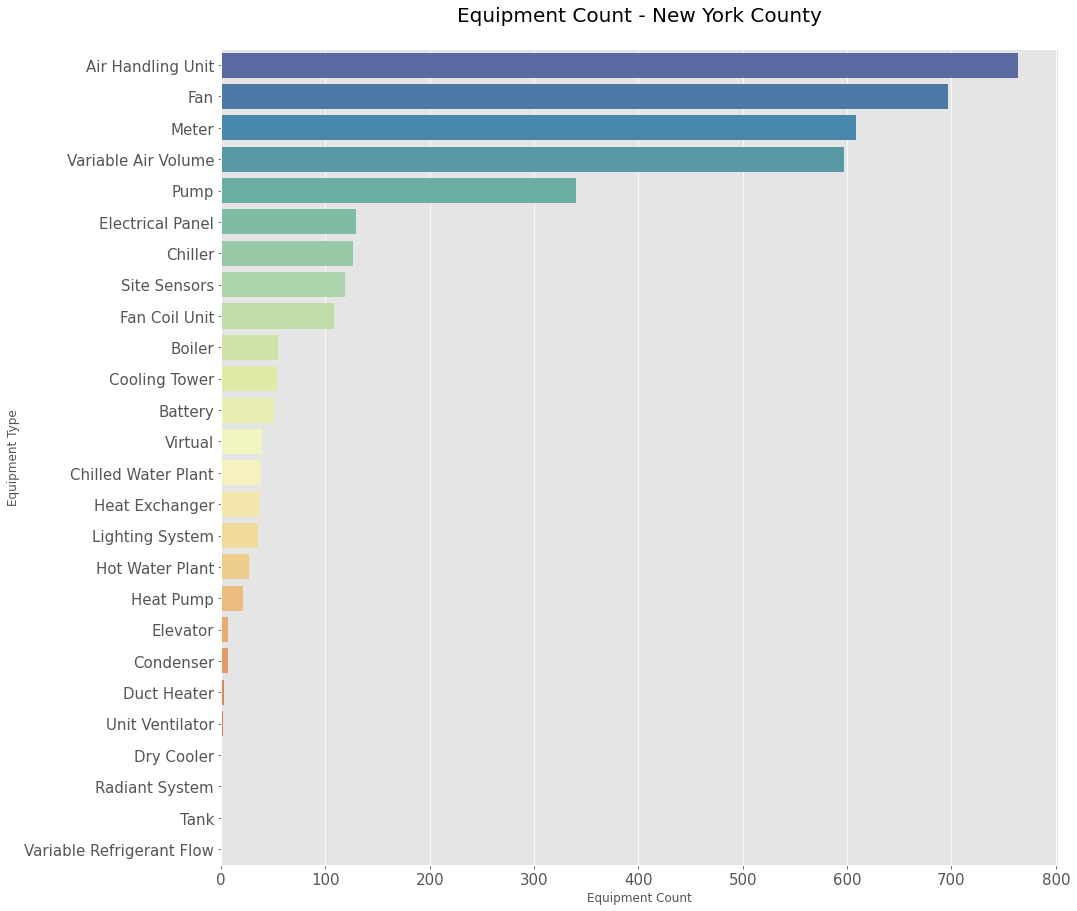

In [77]:
# equipment count for New York County
plt.figure(figsize=(15,15))
sns.barplot(data=df, y='variable', x='value', palette='Spectral_r')
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Equipment Count - New York County\n', size=20)
plt.xlabel('Equipment Count')
plt.ylabel('Equipment Type')
plt.savefig('equip_count_new_york_county.png')
plt.show()


--------------------------
# Point Counts per County
--------------------------

In [78]:
bd_county_stats11

,building_id,city,county,county_number,equip_count,info.customerType,sq_ft,point_count
0,441,bronx,bronx,2,20,Multifamily,551143.0,1293
1,140,newyork,newyork,30,13,Commercial Office,21869.0,354
2,191,victor,ontario,34,7,Commercial Retail,198057.0,19
3,231,newyork,newyork,30,4,,NaN,51
4,248,newyork,newyork,30,7,Multifamily,127000.0,34
...,...,...,...,...,...,...,...,...
224,353,henrietta,monroe,27,7,Commercial Retail,198057.0,19
225,370,newyork,newyork,30,5,Hospitality,421316.0,22
226,383,newyork,newyork,30,11,Commercial Office,75000.0,362
227,398,newyork,newyork,30,26,Commercial Office,860000.0,295


In [79]:
# point type count per county
point_4 = point_2.pivot_table(index='county',columns='point_type',aggfunc='nunique')['point_id'].fillna(0).astype(int)
point_4.style.background_gradient(cmap='YlOrRd', axis=0)

In [80]:
# point type count per neighbourhood (within new york county)
point_5 = point_2[point_2.county =='newyork'].pivot_table(index='county',columns='point_type',aggfunc='nunique')['point_id'].fillna(0).astype(int)
df1 = point_5.melt().sort_values('value', ascending=False).head(20)
df1

,point_type,value
201,Virtual,3965
53,Discharge Air Flow,2474
215,Zone Temperature,2010
178,Status,1318
152,Real Power,1065
24,Command,874
48,Damper Position,847
217,Zone Temperature Setpoint,703
49,Damper Position Sensor,637
174,Speed,625


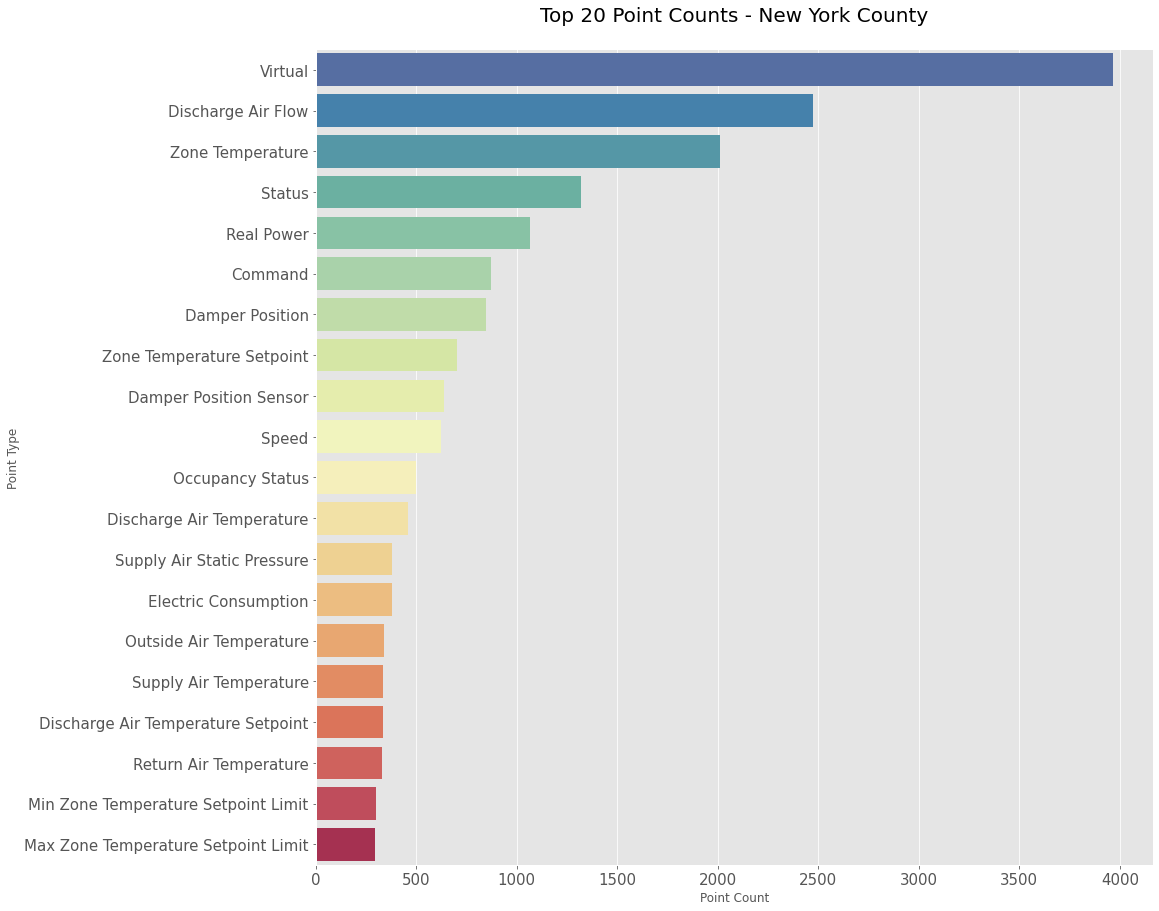

In [81]:
# equipment count for New York County
plt.figure(figsize=(15,15))
sns.barplot(data=df1, y='point_type', x='value', palette='Spectral_r')
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Top 20 Point Counts - New York County\n', size=20)
plt.xlabel('Point Count')
plt.ylabel('Point Type')
plt.savefig('point_count_new_york_county.png')
plt.show()
